## Implementation of MIN MAX and APLHA BETA Pruning
## Tufail Haider
## FA22-BCS-014


Running Min-Max Evaluation...
Optimal Value at Root (Min-Max): 6


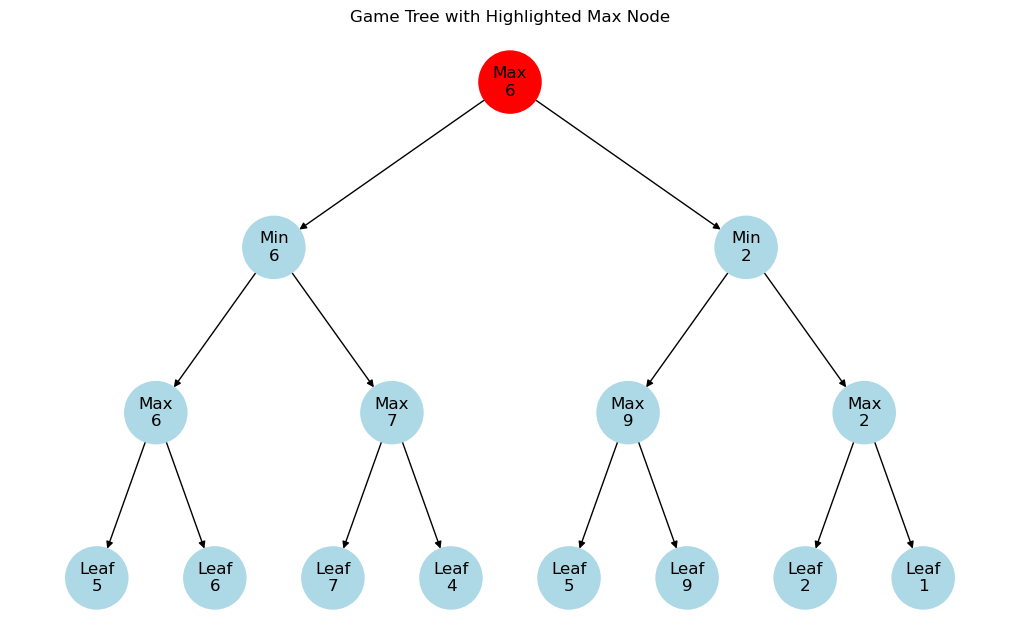


Running Alpha-Beta Pruning Evaluation...
Pruned at Max node
Pruned at Min node
Optimal Value at Root (Alpha-Beta): 6


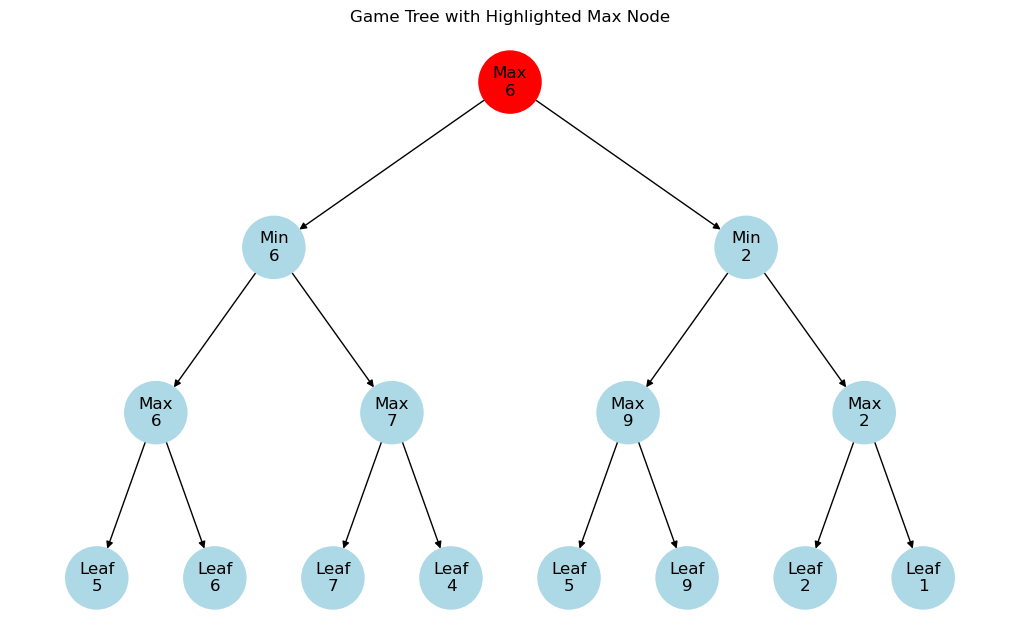

In [ ]:

class Node:
    def __init__(self, value=None, is_max=None, is_leaf=False):
        self.original_value = value if is_leaf else None
        self.value = value
        self.children = []
        self.is_max = is_max
        self.uid = None

    def add_child(self, child_node):
        self.children.append(child_node)

def build_tree():
    leaf_values = [5, 6, 7, 4, 5, 9, 2, 1]
    leaves = [Node(value=v, is_max=None, is_leaf=True) for v in leaf_values]

    max_nodes = []
    for i in range(0, len(leaves), 2):
        max_node = Node(is_max=True)
        max_node.add_child(leaves[i])
        max_node.add_child(leaves[i + 1])
        max_nodes.append(max_node)

    min1 = Node(is_max=False)
    min1.add_child(max_nodes[0])
    min1.add_child(max_nodes[1])

    min2 = Node(is_max=False)
    min2.add_child(max_nodes[2])
    min2.add_child(max_nodes[3])

    root = Node(is_max=True)
    root.add_child(min1)
    root.add_child(min2)

    return root

def min_max(node, depth, max_player):
    if depth == 0 or not node.children:
        return node.original_value

    if max_player:
        best = float('-inf')
        for child in node.children:
            val = min_max(child, depth - 1, False)
            best = max(best, val)
        node.value = best
        return best
    else:
        best = float('inf')
        for child in node.children:
            val = min_max(child, depth - 1, True)
            best = min(best, val)
        node.value = best
        return best

def alpha_beta_pruning(node, depth, alpha, beta, max_player):
    if depth == 0 or not node.children:
        return node.original_value

    if max_player:
        value = float('-inf')
        for child in node.children:
            value = max(value, alpha_beta_pruning(child, depth - 1, alpha, beta, False))
            alpha = max(alpha, value)
            if alpha >= beta:
                print("Pruned at Max node")
                break
        node.value = value
        return value
    else:
        value = float('inf')
        for child in node.children:
            value = min(value, alpha_beta_pruning(child, depth - 1, alpha, beta, True))
            beta = min(beta, value)
            if beta <= alpha:
                print("Pruned at Min node")
                break
        node.value = value
        return value

import networkx as nx
import matplotlib.pyplot as plt

def draw_tree_clean(root):
    G = nx.DiGraph()
    labels = {}
    pos = {}
    node_counter = [0]
    node_colors = []
    uid_to_node = {}

    def assign_uids(node, depth=0, x=0.0):
        node.uid = f"N{node_counter[0]}"
        node_counter[0] += 1
        uid_to_node[node.uid] = node

        node_type = "Max" if node.is_max else "Min" if node.is_max is not None else "Leaf"
        value_to_show = node.original_value if not node.children else node.value
        labels[node.uid] = f"{node_type}\n{value_to_show}"
        pos[node.uid] = (x, -depth)

        width = len(node.children)
        if width == 0:
            return

        spread = 2.0 / (2 ** depth)
        start_x = x - spread / 2

        for i, child in enumerate(node.children):
            child_x = start_x + i * (spread / max(width - 1, 1))
            assign_uids(child, depth + 1, child_x)
            G.add_edge(node.uid, child.uid)

    assign_uids(root)

    max_node_uid = None
    for uid, node in uid_to_node.items():
        if node.is_max and node.value == root.value:
            max_node_uid = uid
            break

    for uid in G.nodes():
        if uid == max_node_uid:
            node_colors.append("red")  
        else:
            node_colors.append("lightblue")

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, arrows=True, node_size=2000, node_color=node_colors)
    nx.draw_networkx_labels(G, pos, labels)
    plt.title("Game Tree with Highlighted Max Node")
    plt.axis('off')
    plt.show()

print("Running Min-Max Evaluation...")
root_minmax = build_tree()
minmax_result = min_max(root_minmax, 3, True)
print("Optimal Value at Root (Min-Max):", minmax_result)
draw_tree_clean(root_minmax)

print("\nRunning Alpha-Beta Pruning Evaluation...")
root_ab = build_tree()
ab_result = alpha_beta_pruning(root_ab, 3, float('-inf'), float('inf'), True)
print("Optimal Value at Root (Alpha-Beta):", ab_result)
draw_tree_clean(root_ab)
